# Coronavirus datasets

In [1]:
import pandas as pd           
import matplotlib.pyplot as plt

In [2]:
state = "Washington"
state_abbr = "WA"

Some dataset options:  
    -[NY Times Github](https://github.com/nytimes/covid-19-data/blob/master/us-states.csv)  
    -[The Atlantic API](https://covidtracking.com/api#swaggerWrapper)  
    -[Bing Github](https://raw.githubusercontent.com/microsoft/Bing-COVID-19-Data/master/data/Bing-COVID19-Data.csv)

------

## NY Times

Up to date (through prior day) and counts are consistant with other sources. Only contains count of cases and deaths. Need to get the full dataset and then filter from there.

In [3]:
state_data = pd.read_csv("https://raw.githubusercontent.com/nytimes/covid-19-data/master/us-states.csv")
state_data.date = pd.to_datetime(state_data.date)

In [4]:
state_data = state_data[state_data.state == state]

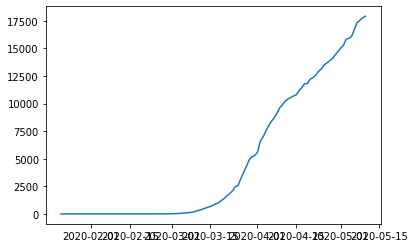

In [5]:
plt.plot(state_data.date, state_data.cases)
plt.show()

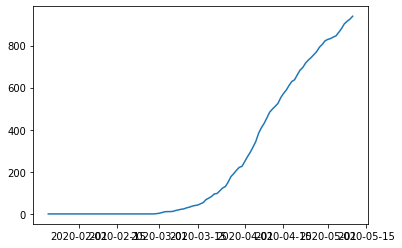

In [6]:
plt.plot(state_data.date, state_data.deaths)
plt.show()

-------------

## The Atlantic

Accessible through API calls so only download the necessary data. Allows period of time and filter by state. Also includes testing data with results and hospitilization/ICU/Ventilator counts. 

In [7]:
import requests

url = "https://covidtracking.com/api/v1/states/" + state_abbr + "/daily.json"
response = requests.get(url)
state_data = pd.read_json(response.content)
state_data.date = pd.to_datetime(state_data.date, format="%Y%m%d")

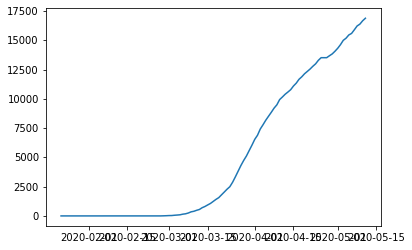

In [8]:
plt.plot(state_data.date, state_data.positive)
plt.show()

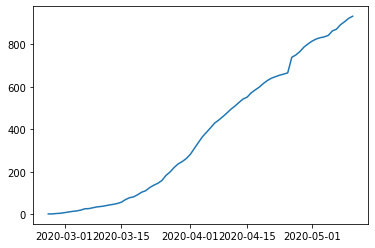

In [9]:
plt.plot(state_data.date, state_data.death)
plt.show()

-------------

## Bing

Data goes down to county level, also has daily changes already calculated. Includes recovery data which might make for some interesting visualizations as well. Contains a lot of data so download is a bit slower.

In [10]:
state_data = pd.read_csv("https://raw.githubusercontent.com/microsoft/Bing-COVID-19-Data/master/data/Bing-COVID19-Data.csv")
state_data = state_data[(state_data.AdminRegion1 == state) & (state_data.AdminRegion2.isnull())]

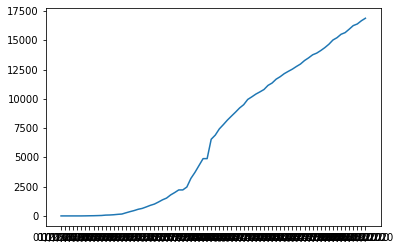

In [11]:
plt.plot(state_data.Updated, state_data.Confirmed)
plt.show()

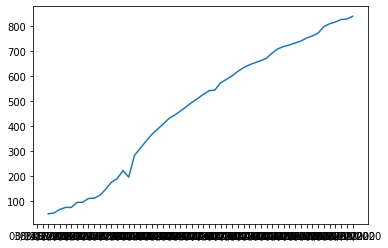

In [12]:
plt.plot(state_data.Updated, state_data.Deaths)
plt.show()

## Connect with Google Trends

In [13]:
from pytrends.request import TrendReq

In [14]:
user_timeframe = "2019-05-11 2020-05-11"
area_code = "en-US-" + state_abbr
pytrend = TrendReq(hl=area_code, tz=480)
keywords = ["Home workouts", "Bars near me", "Boredom"]
pytrend.build_payload(kw_list=keywords, timeframe=user_timeframe)

In [15]:
df = pytrend.interest_over_time()
df.head()

,Home workouts,Bars near me,Boredom,isPartial
date,,,,
2019-05-12,7,69,9,False
2019-05-19,7,74,9,False
2019-05-26,8,82,9,False
2019-06-02,9,77,8,False
2019-06-09,10,80,9,False


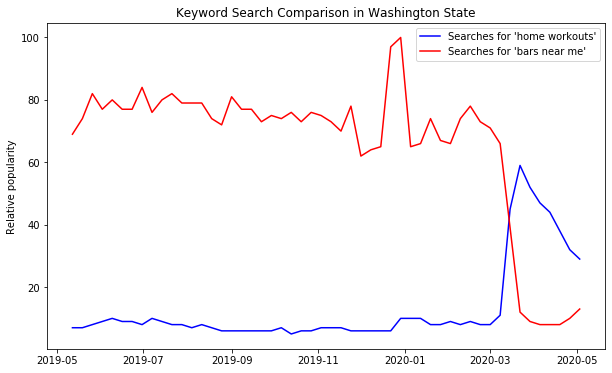

In [22]:
plt.figure(figsize=(10,6))
plt.plot(df.index.values, df["Home workouts"], c="blue", label="Searches for 'home workouts'")
plt.plot(df.index.values, df["Bars near me"], c="red", label="Searches for 'bars near me'")
plt.legend()
plt.ylabel("Relative popularity")
plt.title("Keyword Search Comparison in Washington State")
plt.show()

In [25]:
from gsvi.connection import GoogleConnection
from gsvi.timeseries import SVSeries
import datetime as dt

In [59]:
start = dt.datetime(year=2019, month=5, day=7)
end = dt.datetime(year=2020, month=5, day=7)

connection = GoogleConnection()
query_multi = [{"key": "Home workouts", "geo": "US-WA"},
              {"key": "Bars near me", "geo": "US-WA"}]
series = SVSeries.multivariate(connection=connection, queries=query_multi, start=start, end=end, granularity="MONTH")
ts = series.get_data()

In [60]:
ts = pd.DataFrame(ts)
ts.head()

,Home workouts,Bars near me
2019-05-31 17:00:00,6,83
2019-06-30 17:00:00,6,99
2019-07-31 17:00:00,7,100
2019-08-31 17:00:00,5,97
2019-09-30 17:00:00,5,80


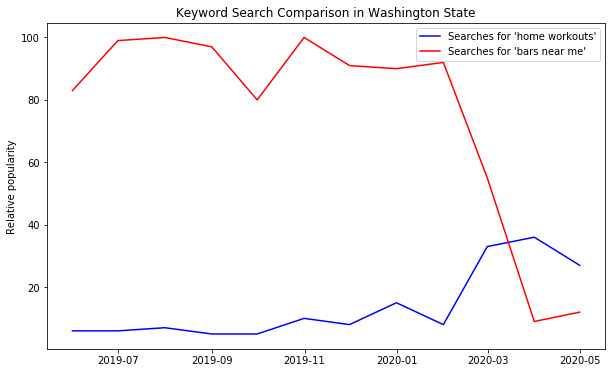

In [61]:
plt.figure(figsize=(10,6))
plt.plot(ts.index.values, ts["Home workouts"], c="blue", label="Searches for 'home workouts'")
plt.plot(ts.index.values, ts["Bars near me"], c="red", label="Searches for 'bars near me'")
plt.legend()
plt.ylabel("Relative popularity")
plt.title("Keyword Search Comparison in Washington State")
plt.show()